In [19]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [21]:
# 데이터 로드
df = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-02-btc-krw.csv")

In [22]:
# 칼럼 데이터 타입 확인
df.dtypes

timestamp     object
quantity     float64
price          int64
fee          float64
amount         int64
side           int64
dtype: object

In [23]:
# timestamp 칼럼 타입을 'object'에서 'datetime'으로 바꾸기
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                 float64
amount                int64
side                  int64
dtype: object

In [24]:
## converting timestamp to detailed date column
df['timestamp_year_month_day'] = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year'] = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month'] = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)
df['timestamp_day'] = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time'] = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour'] = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute'] = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second'] = df['timestamp'].dt.second       # 초(숫자)

In [25]:
# Date
# 'date - amount' 데이터 프레임 만들기
group_date_amount = df['amount'].groupby(df['timestamp_day'])

In [26]:
# date 별 sell - buy 금액
group_date_amount.sum()

timestamp_day
14   -13986080
15      734092
16    17687643
17     1432140
18   -12068675
19    13935899
20     1998820
21     -274696
22    -7300157
23    11705392
24     1013740
25      570258
26   -10570854
27    -6746483
28    21926406
Name: amount, dtype: int64

In [27]:
# 'date - buy amount' connection 만들기
df2 = df.copy()
df2 = df2[df2['amount'] > 0]
group_date_amount_positive = df2['amount'].groupby(df2['timestamp_day'])

In [28]:
# date 별 sell amount 총합 (positive)
group_date_amount_positive.sum()

timestamp_day
14    1531487209
15    2529253711
16    2228838934
17    1374558420
18    2165526961
19    1759974379
20    3007532623
21    5373720824
22    4978452013
23    3178734522
24    1965575540
25    1612991345
26    2736765547
27    2866889083
28    2507614791
Name: amount, dtype: int64

In [29]:
 # 'date - buy amount' connection 만들기
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_date_amount_negative = df3['amount'].groupby(df3['timestamp_day'])

In [30]:
# date 별 buy amount 총 합
group_date_amount_negative.sum()

timestamp_day
14   -1545473289
15   -2528519619
16   -2211151291
17   -1373126280
18   -2177595636
19   -1746038480
20   -3005533803
21   -5373995520
22   -4985752170
23   -3167029130
24   -1964561800
25   -1612421087
26   -2747336401
27   -2873635566
28   -2485688385
Name: amount, dtype: int64

In [31]:
# date 별 절대값 총합
# negative는 buy
absolute_date_negative_sum = group_date_amount_negative.sum()
absolute_date_negative_sum = absolute_date_negative_sum * (-1)
# total은 sell - buy
absolute_date_total_amount = absolute_date_negative_sum+group_date_amount_positive.sum()
absolute_date_total_amount


timestamp_day
14     3076960498
15     5057773330
16     4439990225
17     2747684700
18     4343122597
19     3506012859
20     6013066426
21    10747716344
22     9964204183
23     6345763652
24     3930137340
25     3225412432
26     5484101948
27     5740524649
28     4993303176
Name: amount, dtype: int64

In [32]:

# date 별 계산 table 생성
dfs = [group_date_amount.size(), group_date_amount.sum(), group_date_amount_positive.size(), group_date_amount_positive.sum(), group_date_amount_negative.size(), group_date_amount_negative.sum(), absolute_date_negative_sum]
day_df_date_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_day'), dfs)
day_df_date_final.columns = [ "Date transaction", "Date sell-buy", "Date sell transaction", "Date sell", "Date buy transaction", "Date buy", "Date absolute buy"]
day_df_date_final

,Date transaction,Date sell-buy,Date sell transaction,Date sell,Date buy transaction,Date buy,Date absolute buy
timestamp_day,,,,,,,
14,931,-13986080,587,1531487209,344,-1545473289,1545473289
15,1487,734092,867,2529253711,620,-2528519619,2528519619
16,1208,17687643,684,2228838934,524,-2211151291,2211151291
17,688,1432140,357,1374558420,331,-1373126280,1373126280
18,1047,-12068675,560,2165526961,487,-2177595636,2177595636
19,892,13935899,517,1759974379,375,-1746038480,1746038480
20,1523,1998820,908,3007532623,615,-3005533803,3005533803
21,2212,-274696,1293,5373720824,919,-5373995520,5373995520
22,2119,-7300157,1235,4978452013,884,-4985752170,4985752170


In [33]:
# table 저장하기
day_df_date_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/date_result_table.csv", header=True, index=True, encoding = 'utf-8')

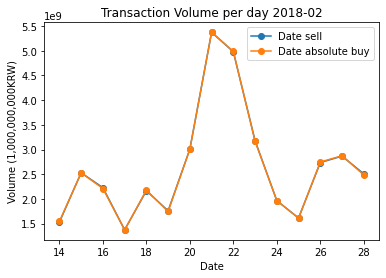

In [37]:
# Date - transaction 금액 그래프 그리기
dayTransVolGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot(title='Transaction Volume per day 2018-02', marker='o')
dayTransVolGraph.set_xlabel('Date')
dayTransVolGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-02-Trans_Vol_per_day.png', dpi=300)

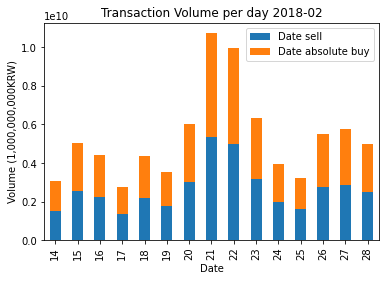

In [38]:
dayTransGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot.bar(title='Transaction Volume per day 2018-02', stacked=True)
dayTransGraph.set_xlabel('Date')
dayTransGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-02-Trans_Vol_per_day(stacked).png', dpi=300)

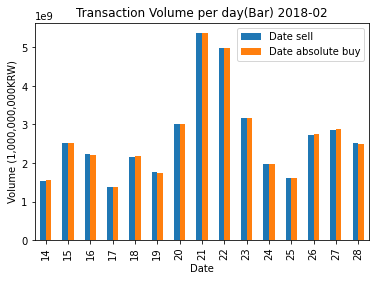

In [39]:
dayTransBarGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot.bar(title='Transaction Volume per day(Bar) 2018-02')
dayTransBarGraph.set_xlabel('Date')
dayTransBarGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-02-Trans_Vol_per_day(bar).png', dpi=300)